<a href="https://colab.research.google.com/github/mahakmeh/demorep/blob/main/mahakmehradevcommtask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
training = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
training['train_test'] = 1
test['train_test'] = 0
test['confidence'] = np.NaN
all_data = pd.concat([training,test])

%matplotlib inline
all_data.columns

print(training.head())
print(test.head())

      id  latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0  80378   -16.051    141.996       322.8   2.0    1.4  2019-12-03      1335   
1  79962   -32.855    150.711       335.0   1.2    1.1  2019-12-03       405   
2   9680   -12.216    132.732       346.1   1.4    1.2  2019-10-12       435   
3  61999   -32.991    150.507       358.8   1.0    1.0  2019-11-19       350   
4  44632   -12.938    136.140       324.4   1.0    1.0  2019-11-10      1330   

  satellite instrument  confidence version  bright_t31   frp daynight  \
0     Terra      MODIS         100  6.0NRT       298.5  42.8        N   
1      Aqua      MODIS          84  6.0NRT       305.4  29.1        D   
2      Aqua      MODIS          90  6.0NRT       312.3  52.1        D   
3      Aqua      MODIS          99  6.0NRT       313.7  68.8        D   
4     Terra      MODIS         100  6.0NRT       295.0  21.8        N   

   train_test  
0           1  
1           1  
2           1  
3           1  


# Light Data Exploration

1) For numeric data
* Made histograms to understand distributions
* Corrplot
* Pivot table comparing survival rate across numeric variables

2) For Categorical Data
* Made bar charts to understand balance of classes
* Made pivot tables to understand relationship with survival

In [ ]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146874 entries, 0 to 146873
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          146874 non-null  int64  
 1   latitude    146874 non-null  float64
 2   longitude   146874 non-null  float64
 3   brightness  146874 non-null  float64
 4   scan        146874 non-null  float64
 5   track       146874 non-null  float64
 6   acq_date    146874 non-null  object 
 7   acq_time    146874 non-null  int64  
 8   satellite   146874 non-null  object 
 9   instrument  146874 non-null  object 
 10  confidence  146874 non-null  int64  
 11  version     146874 non-null  object 
 12  bright_t31  146874 non-null  float64
 13  frp         146874 non-null  float64
 14  daynight    146874 non-null  object 
 15  train_test  146874 non-null  int64  
dtypes: float64(7), int64(4), object(5)
memory usage: 17.9+ MB


In [ ]:
training.describe()

,id,latitude,longitude,brightness,scan,track,acq_time,confidence,bright_t31,frp,train_test
count,146874.000000,146874.000000,146874.000000,146874.000000,146874.000000,146874.000000,146874.000000,146874.000000,146874.000000,146874.000000,146874.0
mean,91720.873211,-27.102961,141.953939,339.067335,1.605318,1.208549,812.243862,75.012221,303.319588,95.635667,1.0
std,53006.569183,8.172219,11.017463,28.621930,0.812478,0.248132,622.273064,25.020677,13.349428,242.927636,0.0
min,2.000000,-43.116000,113.458000,300.000000,1.000000,1.000000,0.000000,0.000000,265.900000,0.000000,1.0
25%,45827.250000,-33.110000,131.604000,320.800000,1.000000,1.000000,345.000000,59.000000,293.800000,18.200000,1.0
50%,91739.500000,-30.130500,147.888000,334.300000,1.300000,1.100000,515.000000,82.000000,302.000000,36.500000,1.0
75%,137588.500000,-17.871000,150.650000,348.600000,1.800000,1.300000,1330.000000,99.000000,311.600000,82.500000,1.0
max,183593.000000,-9.387000,153.477000,507.000000,4.800000,2.000000,2355.000000,100.000000,400.100000,11164.100000,1.0


In [ ]:
training.describe().columns

Index(['id', 'latitude', 'longitude', 'brightness', 'scan', 'track',
       'acq_time', 'confidence', 'bright_t31', 'frp', 'train_test'],
      dtype='object')

In [ ]:
num_df = training[['latitude','longitude','brightness','scan','track','acq_time','bright_t31','frp','confidence']]
cat_df = training[['satellite','daynight']]
print(training.head())

      id  latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0  80378   -16.051    141.996       322.8   2.0    1.4  2019-12-03      1335   
1  79962   -32.855    150.711       335.0   1.2    1.1  2019-12-03       405   
2   9680   -12.216    132.732       346.1   1.4    1.2  2019-10-12       435   
3  61999   -32.991    150.507       358.8   1.0    1.0  2019-11-19       350   
4  44632   -12.938    136.140       324.4   1.0    1.0  2019-11-10      1330   

  satellite instrument  confidence version  bright_t31   frp daynight  \
0     Terra      MODIS         100  6.0NRT       298.5  42.8        N   
1      Aqua      MODIS          84  6.0NRT       305.4  29.1        D   
2      Aqua      MODIS          90  6.0NRT       312.3  52.1        D   
3      Aqua      MODIS          99  6.0NRT       313.7  68.8        D   
4     Terra      MODIS         100  6.0NRT       295.0  21.8        N   

   train_test  
0           1  
1           1  
2           1  
3           1  


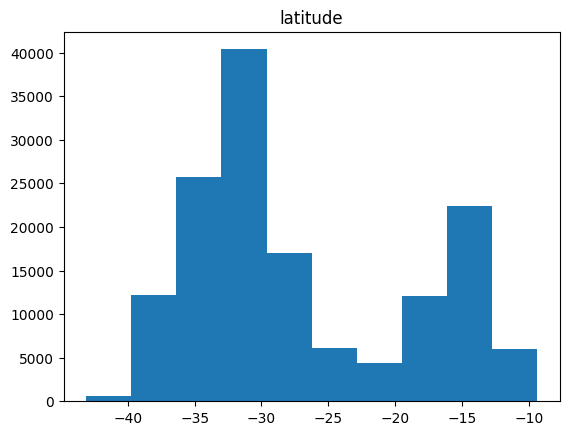

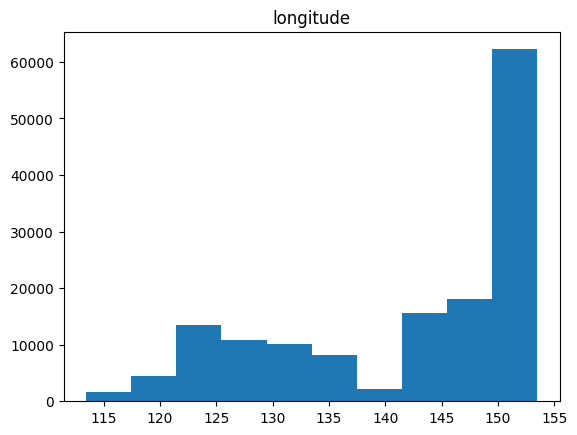

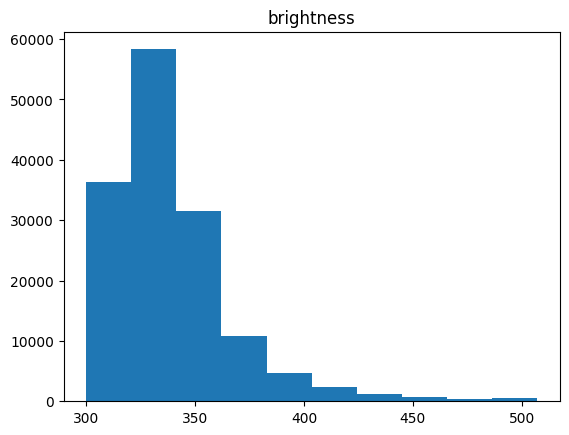

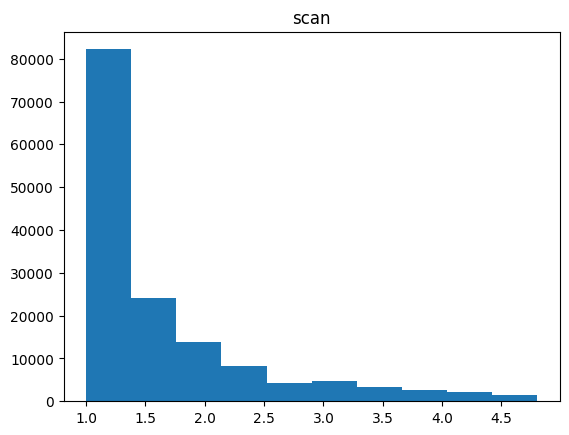

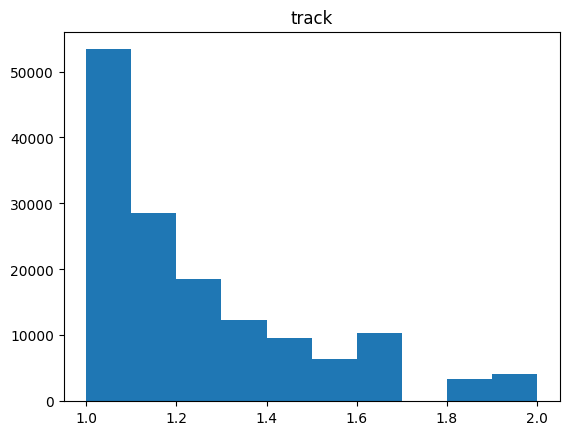

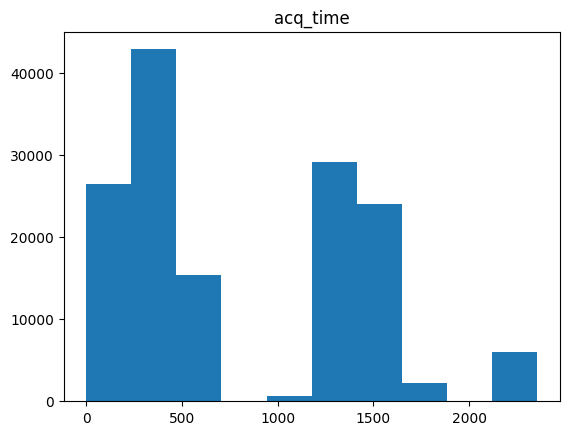

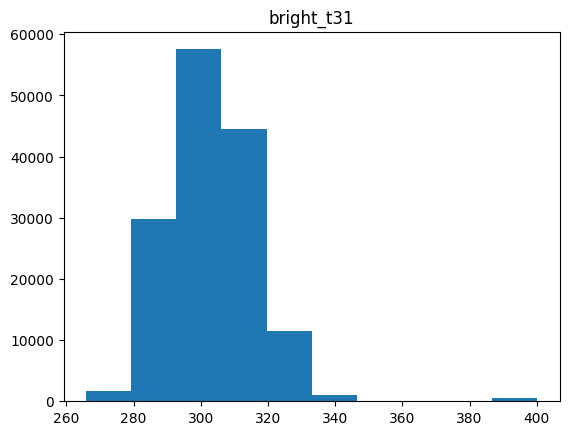

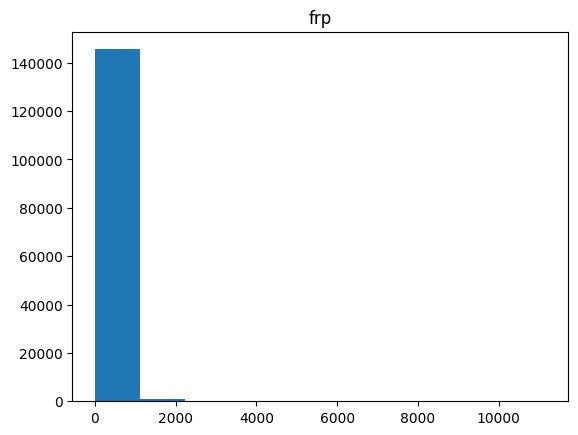

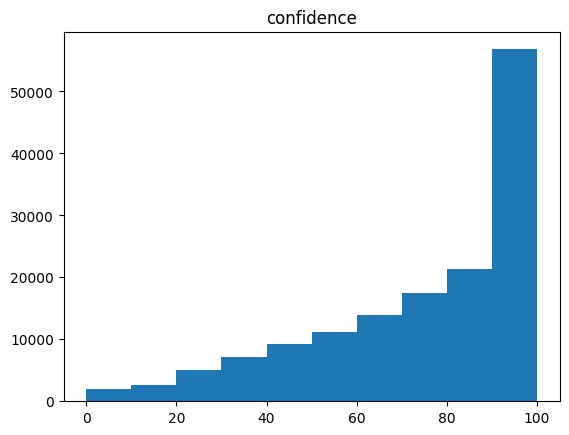

In [ ]:
for i in num_df.columns:
    plt.hist(num_df[i])
    plt.title(i)
    plt.show()

id            0
latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
train_test    0
dtype: int64
id                0
latitude          0
longitude         0
brightness        0
scan              0
track             0
acq_date          0
acq_time          0
satellite         0
instrument        0
version           0
bright_t31        0
frp               0
daynight          0
train_test        0
confidence    36719
dtype: int64


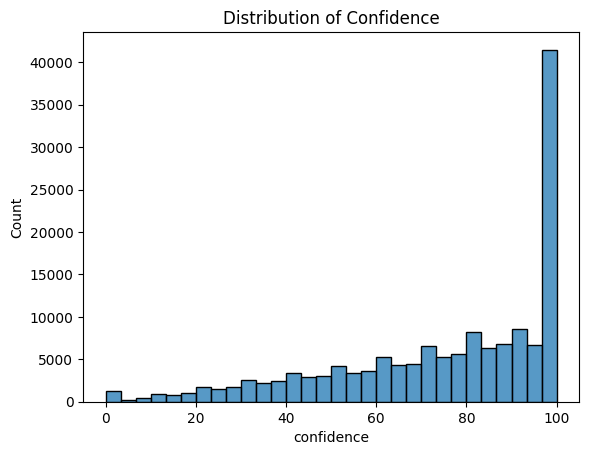

In [ ]:
# Check for missing values
print(training.isnull().sum())
print(test.isnull().sum())

# Distribution of the target variable
sns.histplot(training['confidence'], bins=30)
plt.title('Distribution of Confidence')
plt.show()

            latitude  longitude  brightness      scan     track  acq_time  \
latitude    1.000000  -0.424695   -0.093580  0.088163  0.095902 -0.244665   
longitude  -0.424695   1.000000   -0.109463 -0.132493 -0.139135  0.192953   
brightness -0.093580  -0.109463    1.000000 -0.107131 -0.113351 -0.318620   
scan        0.088163  -0.132493   -0.107131  1.000000  0.983273 -0.028288   
track       0.095902  -0.139135   -0.113351  0.983273  1.000000 -0.023124   
acq_time   -0.244665   0.192953   -0.318620 -0.028288 -0.023124  1.000000   
bright_t31  0.190107  -0.318135    0.682147 -0.095352 -0.096800 -0.471599   
frp        -0.097083  -0.064512    0.631331  0.183931  0.179167 -0.086161   
confidence -0.067091  -0.053715    0.525874 -0.101808 -0.107277 -0.057690   

            bright_t31       frp  confidence  
latitude      0.190107 -0.097083   -0.067091  
longitude    -0.318135 -0.064512   -0.053715  
brightness    0.682147  0.631331    0.525874  
scan         -0.095352  0.183931   -0.101

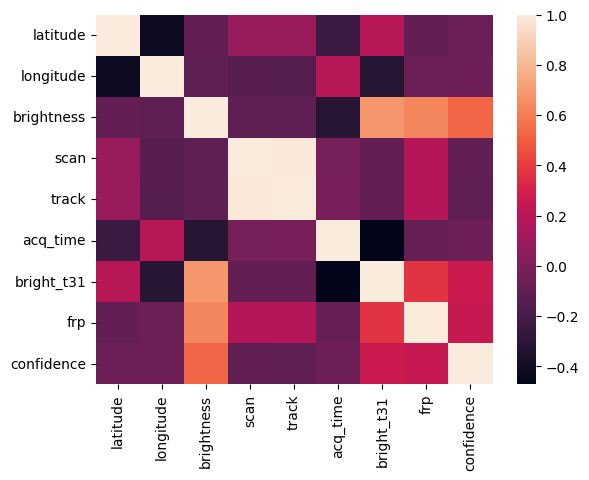

In [ ]:
print(num_df.corr())
sns.heatmap(num_df.corr())
print(training.head())

*There are no missing values in the dataset*

In [ ]:
daynight_mapping = {'D': 1, 'N': 0}
training['daynight'] = training['daynight'].map(daynight_mapping)
test['daynight'] = test['daynight'].map(daynight_mapping)
satellite_mapping = {'Aqua': 0, 'Terra': 1}
training['satellite'] = training['satellite'].map(satellite_mapping)
test['satellite'] = test['satellite'].map(satellite_mapping)
print(training.head())
print(test.head())

      id  latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0  80378   -16.051    141.996       322.8   2.0    1.4  2019-12-03      1335   
1  79962   -32.855    150.711       335.0   1.2    1.1  2019-12-03       405   
2   9680   -12.216    132.732       346.1   1.4    1.2  2019-10-12       435   
3  61999   -32.991    150.507       358.8   1.0    1.0  2019-11-19       350   
4  44632   -12.938    136.140       324.4   1.0    1.0  2019-11-10      1330   

   satellite instrument  confidence version  bright_t31   frp  daynight  \
0          1      MODIS         100  6.0NRT       298.5  42.8         0   
1          0      MODIS          84  6.0NRT       305.4  29.1         1   
2          0      MODIS          90  6.0NRT       312.3  52.1         1   
3          0      MODIS          99  6.0NRT       313.7  68.8         1   
4          1      MODIS         100  6.0NRT       295.0  21.8         0   

   train_test  
0           1  
1           1  
2           1  
3   

In [ ]:
print(training.head())
print(test.head())

      id  latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0  80378   -16.051    141.996       322.8   2.0    1.4  2019-12-03      1335   
1  79962   -32.855    150.711       335.0   1.2    1.1  2019-12-03       405   
2   9680   -12.216    132.732       346.1   1.4    1.2  2019-10-12       435   
3  61999   -32.991    150.507       358.8   1.0    1.0  2019-11-19       350   
4  44632   -12.938    136.140       324.4   1.0    1.0  2019-11-10      1330   

   satellite instrument  confidence version  bright_t31   frp  daynight  \
0          1      MODIS         100  6.0NRT       298.5  42.8         0   
1          0      MODIS          84  6.0NRT       305.4  29.1         1   
2          0      MODIS          90  6.0NRT       312.3  52.1         1   
3          0      MODIS          99  6.0NRT       313.7  68.8         1   
4          1      MODIS         100  6.0NRT       295.0  21.8         0   

   train_test  
0           1  
1           1  
2           1  
3   

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Sample data setup (replace with your actual data loading mechanism)
# training = pd.read_csv('training_data.csv')
# test = pd.read_csv('test_data.csv')

# Assume the following as the DataFrame columns
features = ['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_time', 'satellite']
target = 'confidence'

# Convert 'acq_date' to datetime if it's not already
training['acq_date'] = pd.to_datetime(training['acq_date'], errors='coerce')
test['acq_date'] = pd.to_datetime(test['acq_date'], errors='coerce')

# Extract month and hour from acquisition time
training['month'] = training['acq_date'].dt.month
test['month'] = test['acq_date'].dt.month
training['hour'] = training['acq_time'] // 100  # Extract hour from acq_time
test['hour'] = test['acq_time'] // 100

# Define a bias towards brightness
bias_factor = 1.5  # Adjust as needed

# Apply the bias towards brightness
training['brightness_bias'] = training['brightness'] * bias_factor
test['brightness_bias'] = test['brightness'] * bias_factor

# Update features list
features.extend(['month', 'hour', 'brightness_bias'])

# Ensure consistent columns in the same order for both training and test datasets
X_train = training[features]
y_train = training[target]
X_test = test[features]

# Define and train the model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Output the R^2 score
print(f'R^2 Score on training set: {r2_score(y_train, rf_model.predict(X_train))}')


R^2 Score on training set: 0.9488337291685529


In [ ]:
print(y_pred)

[57.91 52.43 68.49 ... 99.94 60.83 94.22]


In [ ]:
if len(y_pred) == len(test):
    submission = pd.DataFrame({'id': test['id'], 'confidence': y_pred})
    submission.to_csv('submission.csv', index=False)
    print("done")
else:
    print("Error: The length of predictions does not match the length of the test set.")
    print(f"Length of test set: {len(test)}")
    print(f"Length of test predictions: {len(y_pred)}")

done


In [ ]:
submission

In [ ]:
from google.colab import files

# Download the file
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')